<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-04-19 00:16:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  40.7MB/s    in 4.5s    

2025-04-19 00:16:22 (33.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



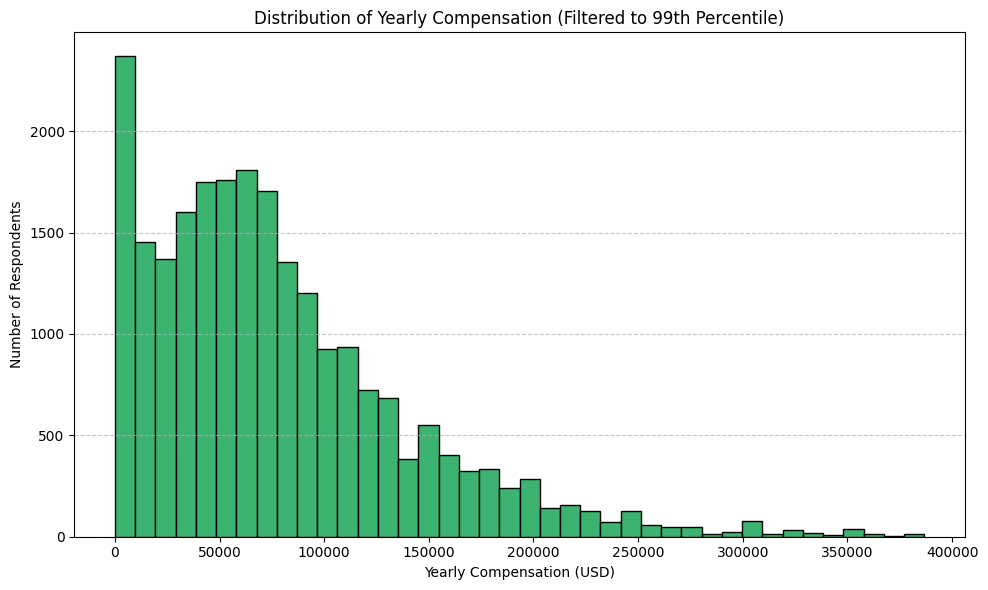

In [4]:
## Write your code here

# Drop missing compensation data and remove extreme outliers (e.g., top 1%)
df_cleaned = df['ConvertedCompYearly'].dropna()
df_cleaned = df_cleaned[df_cleaned < df_cleaned.quantile(0.99)]  # Keep only up to the 99th percentile

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned, bins=40, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Yearly Compensation (Filtered to 99th Percentile)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [5]:
## Write your code here

df['Age']=pd.to_numeric(df['Age'].map({'Under 18 years old':10,'18-24 years old':21,'25-34 years old':31,'35-44 years old':41,'45-54 years old':51,'55-64 years old':61,'65 years or older':71}))

<Figure size 1000x600 with 0 Axes>

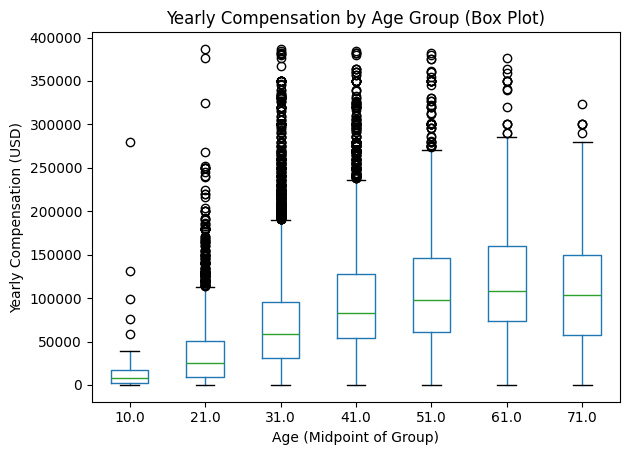

In [6]:

# Drop missing values for Age and Compensation
df_cleaned = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Optional: Filter out extreme outliers in compensation
df_cleaned = df_cleaned[df_cleaned['ConvertedCompYearly'] < df_cleaned['ConvertedCompYearly'].quantile(0.99)]

# Convert Age to numeric midpoint if it's categorical
# If Age is numeric already, skip this
if df_cleaned['Age'].dtype == 'object':
    # Create a mapping of age ranges to midpoints
    age_map = {
        '18-24': 21,
        '25-34': 29.5,
        '35-44': 39.5,
        '45-54': 49.5,
        '55-64': 59.5,
        '65+': 70
    }
    df_cleaned['AgeMid'] = df_cleaned['Age'].map(age_map)
else:
    df_cleaned['AgeMid'] = df_cleaned['Age']  # Already numeric

# Create a box plot: Compensation by AgeMid
plt.figure(figsize=(10, 6))
df_cleaned.boxplot(column='ConvertedCompYearly', by='AgeMid', grid=False)
plt.title('Yearly Compensation by Age Group (Box Plot)')
plt.suptitle('')
plt.xlabel('Age (Midpoint of Group)')
plt.ylabel('Yearly Compensation (USD)')
plt.tight_layout()

# Show the plot
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



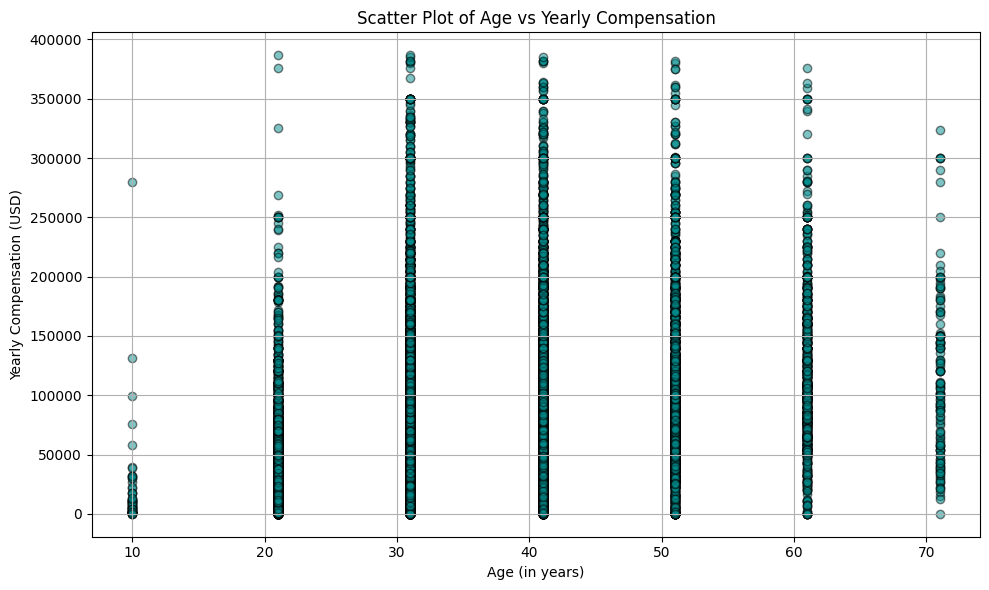

In [7]:
## Write your code here
# Drop missing values
df_cleaned = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Filter out extreme outliers in compensation for better visualization (e.g., top 1%)
df_cleaned = df_cleaned[df_cleaned['ConvertedCompYearly'] < df_cleaned['ConvertedCompYearly'].quantile(0.99)]

# Convert 'Age' to numeric if it's categorical
if df_cleaned['Age'].dtype == 'object':
    age_map = {
        '18-24': 21,
        '25-34': 29.5,
        '35-44': 39.5,
        '45-54': 49.5,
        '55-64': 59.5,
        '65+': 70
    }
    df_cleaned['Age_numeric'] = df_cleaned['Age'].map(age_map)
else:
    df_cleaned['Age_numeric'] = df_cleaned['Age']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Age_numeric'], df_cleaned['ConvertedCompYearly'], alpha=0.5, color='darkcyan', edgecolor='k')

# Customize the chart
plt.title('Scatter Plot of Age vs Yearly Compensation')
plt.xlabel('Age (in years)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


<ipython-input-8-1dc2ddc57ef0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age_numeric'] = df_cleaned['Age']


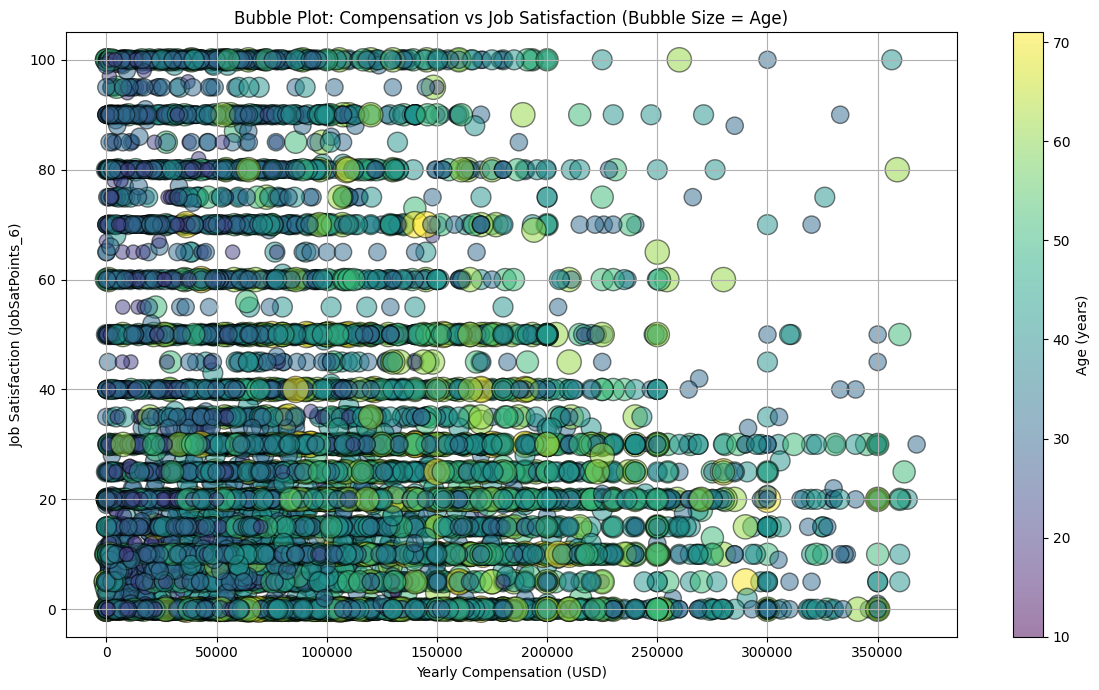

In [8]:
## Write your code here
# Drop rows with missing relevant data
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'])

# Convert 'Age' to numeric if it's categorical
if df_cleaned['Age'].dtype == 'object':
    age_map = {
        '18-24': 21,
        '25-34': 29.5,
        '35-44': 39.5,
        '45-54': 49.5,
        '55-64': 59.5,
        '65+': 70
    }
    df_cleaned['Age_numeric'] = df_cleaned['Age'].map(age_map)
else:
    df_cleaned['Age_numeric'] = df_cleaned['Age']

# Filter out top 1% compensation for clearer visualization
df_filtered = df_cleaned[df_cleaned['ConvertedCompYearly'] < df_cleaned['ConvertedCompYearly'].quantile(0.99)]

# Scale bubble sizes (age) for better visual effect
bubble_sizes = df_filtered['Age_numeric'] * 5  # Adjust scaling factor as needed

# Plot the bubble chart
plt.figure(figsize=(12, 7))
plt.scatter(
    df_filtered['ConvertedCompYearly'],
    df_filtered['JobSatPoints_6'],
    s=bubble_sizes,
    alpha=0.5,
    c=df_filtered['Age_numeric'],
    cmap='viridis',
    edgecolor='k'
)

# Customize the chart
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.colorbar(label='Age (years)')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



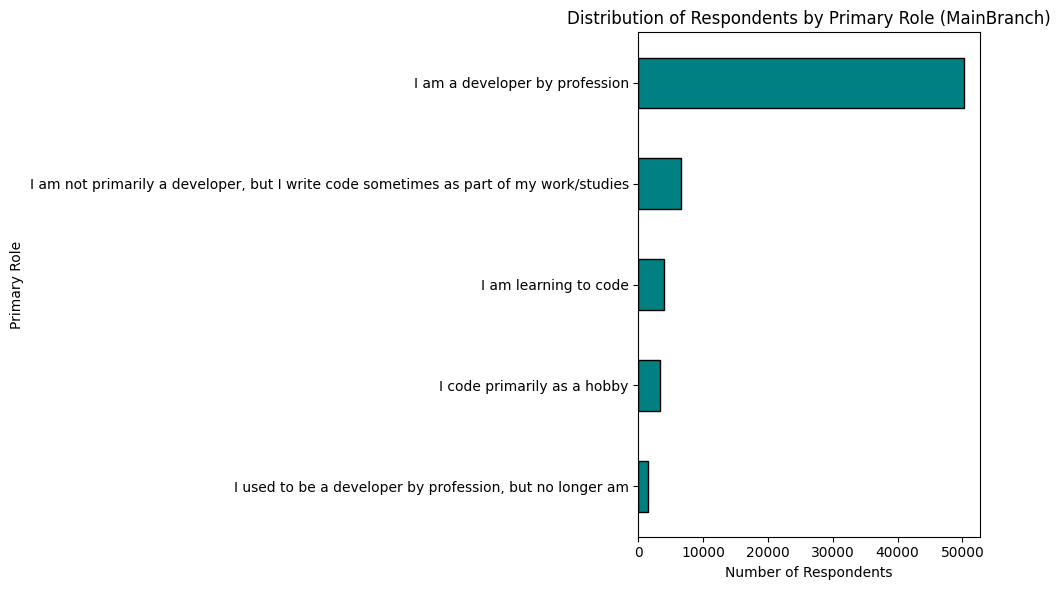

In [9]:
## Write your code here

# Drop missing values from MainBranch
main_branch_counts = df['MainBranch'].dropna().value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='teal', edgecolor='black')

# Customize the chart
plt.title('Distribution of Respondents by Primary Role (MainBranch)')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')
plt.gca().invert_yaxis()  # Highest count on top
plt.tight_layout()

# Show the plot
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



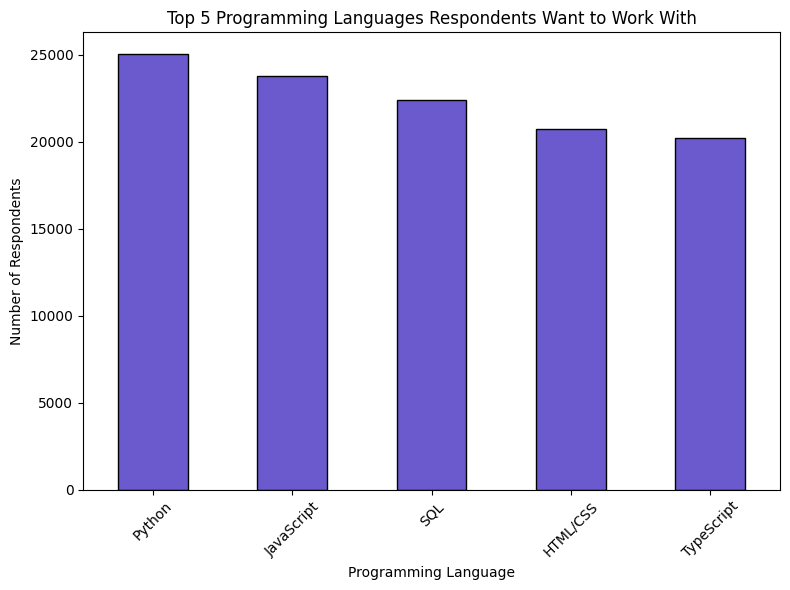

In [11]:
## Write your code here
# Drop missing values in LanguageWantToWorkWith
lang_data = df['LanguageWantToWorkWith'].dropna()

# Split multiple languages and flatten the list
langs = lang_data.str.split(';')
flat_list = [lang.strip() for sublist in langs for lang in sublist]

# Count frequency of each language
lang_counts = pd.Series(flat_list).value_counts().head(5)

# Plot vertical bar chart
plt.figure(figsize=(8, 6))
lang_counts.plot(kind='bar', color='slateblue', edgecolor='black')

# Customize the chart
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()







##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


<ipython-input-12-20af95711622>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age_numeric'] = df_cleaned['Age']
<ipython-input-12-20af95711622>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age_numeric'], bins=age_bins, labels=age_labels, right=True)
<ipython-input-12-20af95711622>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behav

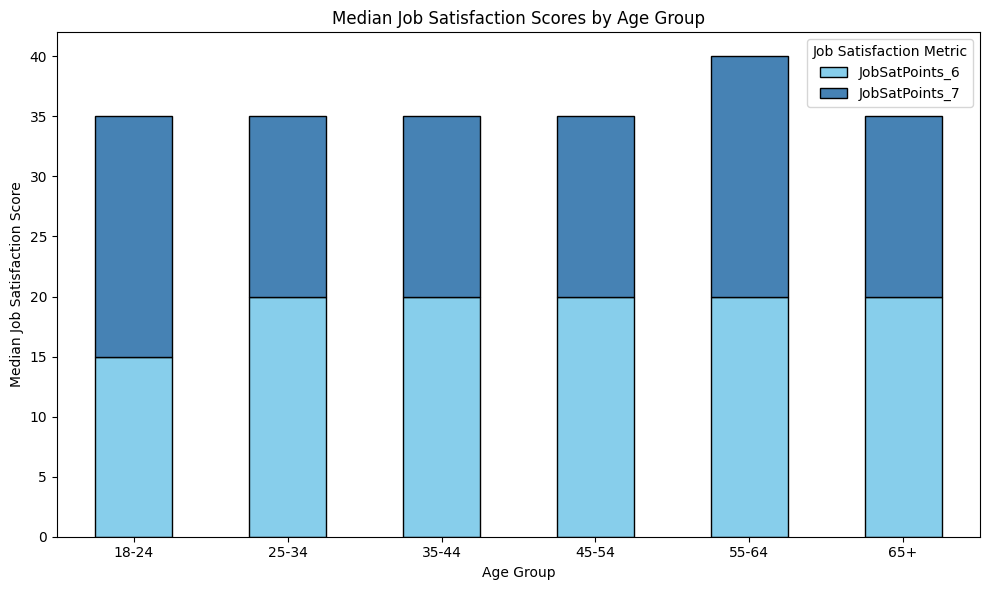

In [12]:
## Write your code here

# Drop rows with missing values in required columns
df_cleaned = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Convert Age to numerical midpoint if it's categorical
if df_cleaned['Age'].dtype == 'object':
    age_map = {
        '18-24': 21,
        '25-34': 29.5,
        '35-44': 39.5,
        '45-54': 49.5,
        '55-64': 59.5,
        '65+': 70
    }
    df_cleaned['Age_numeric'] = df_cleaned['Age'].map(age_map)
else:
    df_cleaned['Age_numeric'] = df_cleaned['Age']

# Create age groups using bins
age_bins = [18, 24, 34, 44, 54, 64, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age_numeric'], bins=age_bins, labels=age_labels, right=True)

# Group by AgeGroup and compute median satisfaction scores
grouped = df_cleaned.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'steelblue'], edgecolor='black')

# Customize the chart
plt.title('Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=0)
plt.legend(title='Job Satisfaction Metric')
plt.tight_layout()

# Show plot
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



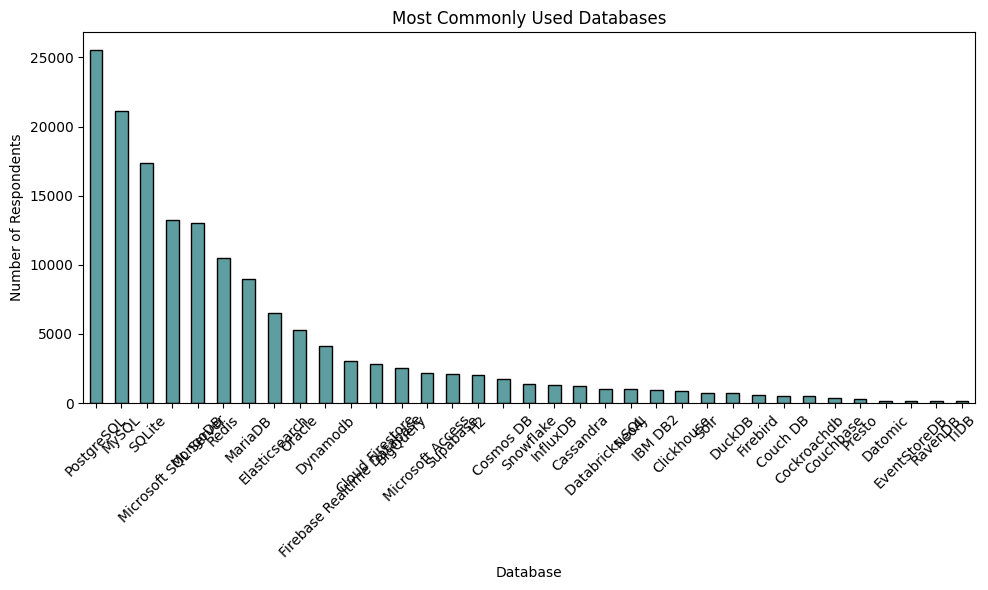

In [13]:
## Write your code here

# Drop missing values in DatabaseHaveWorkedWith column
db_data = df['DatabaseHaveWorkedWith'].dropna()

# Split multiple databases and flatten the list
databases = db_data.str.split(';')
flat_list = [db.strip() for sublist in databases for db in sublist]

# Count the frequency of each database
db_counts = pd.Series(flat_list).value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
db_counts.plot(kind='bar', color='cadetblue', edgecolor='black')

# Customize the chart
plt.title('Most Commonly Used Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



<ipython-input-14-21ec1f8be2aa>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age_numeric'] = df_cleaned['Age']
<ipython-input-14-21ec1f8be2aa>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age_numeric'], bins=age_bins, labels=age_labels, right=True)
<ipython-input-14-21ec1f8be2aa>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behav

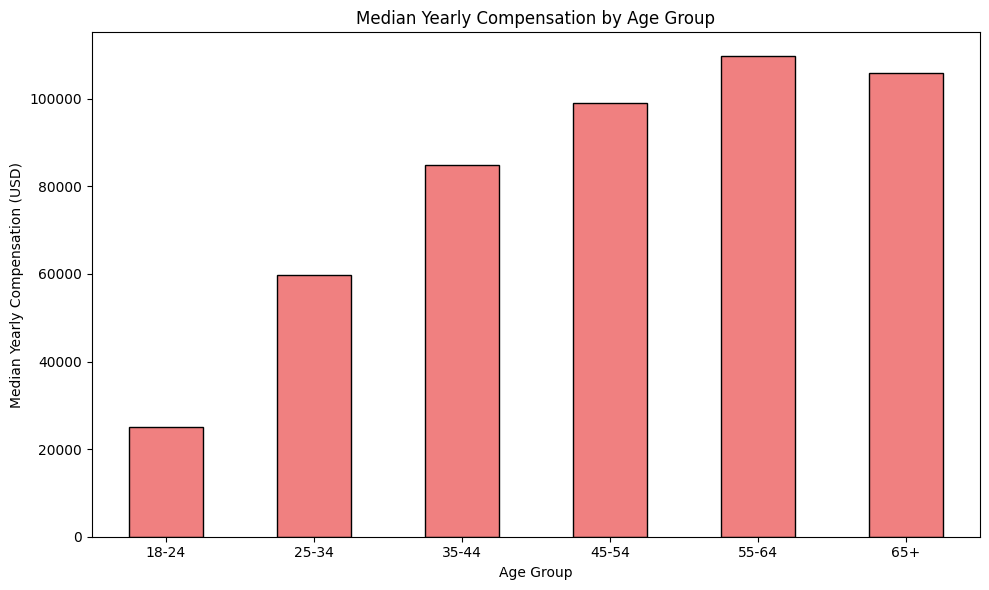

In [14]:
## Write your code here
# Drop rows with missing values in Age and ConvertedCompYearly
df_cleaned = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Convert Age to numeric if it's categorical
if df_cleaned['Age'].dtype == 'object':
    age_map = {
        '18-24': 21,
        '25-34': 29.5,
        '35-44': 39.5,
        '45-54': 49.5,
        '55-64': 59.5,
        '65+': 70
    }
    df_cleaned['Age_numeric'] = df_cleaned['Age'].map(age_map)
else:
    df_cleaned['Age_numeric'] = df_cleaned['Age']

# Create age groups using bins
age_bins = [18, 24, 34, 44, 54, 64, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age_numeric'], bins=age_bins, labels=age_labels, right=True)

# Group by AgeGroup and calculate median compensation
median_compensation = df_cleaned.groupby('AgeGroup')['ConvertedCompYearly'].median()

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
median_compensation.plot(kind='bar', color='lightcoral', edgecolor='black')

# Customize the chart
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



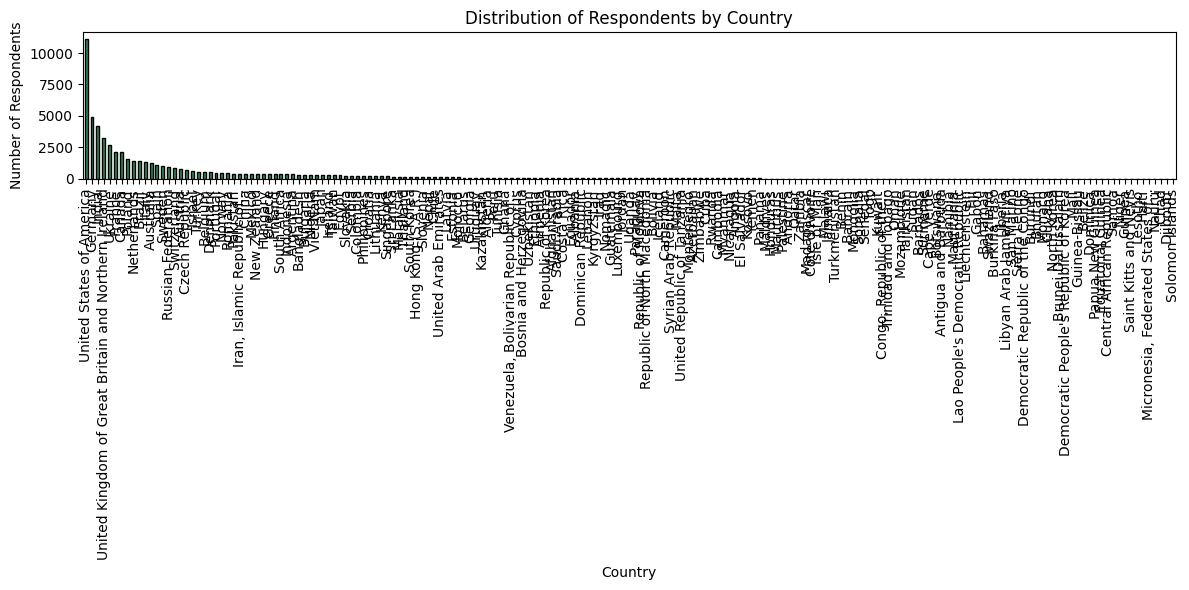

In [15]:
## Write your code here
# Drop missing values in the 'Country' column
country_counts = df['Country'].dropna().value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='seagreen', edgecolor='black')

# Customize the chart
plt.title('Distribution of Respondents by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)  # Rotate country labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
